# Objetivos deste trabalho
- Familiarizar-se com a biblioteca PyTorch
- Definir arquiteturas MLP simples em PyTorch
- Treinar utilizando CIFAR10, testando diferentes arquiteturas, parâmetros, funções de loss e otimizadores
- Comparar os resultados obtidos utilizando apenas Perpceptrons

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
# Carregar os datasets

transform=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=200)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=200)

In [5]:
# Definir a arquitetura MLP

class MLP(nn.Module):

    def __init__(self, layers):
        super(MLP, self).__init__()
        self.layers = layers
        self.fc1 = nn.Linear(32*32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10)
        self.activation_function = torch.nn.ReLU()
#         self.activation_function = torch.nn.LeakyReLU()
        
    def forward(self, x):
        x = x.view(-1, 32*32)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.activation_function(self.fc3(x))
        x = self.activation_function(self.fc4(x))
        return x

In [6]:
model = MLP([]).to(device)
print(device)
print(model)

# Definir otimizador e loss
# Nota: testar outros otimizadores e funções de loss (em particular cross entropy)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
loss_fn = torch.nn.CrossEntropyLoss().cuda()

cuda:0
MLP(
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (activation_function): ReLU()
)


In [7]:
# Realizar o treinamento aqui

inputs_list = []
labels_list = []
for _, (inputs, labels) in enumerate(train_loader):
    inputs_list.append(inputs.to(device))
    labels_list.append(labels.to(device))
        
losses = []
for epoch in range(5000):
    running_loss = 0.0
    
    for i, (inputs, labels) in enumerate(zip(inputs_list, labels_list), 0):
        optimizer.zero_grad()
        
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0
    

[1,   200] loss: 2.303
[2,   200] loss: 2.303
[3,   200] loss: 2.302
[4,   200] loss: 2.302
[5,   200] loss: 2.301
[6,   200] loss: 2.301
[7,   200] loss: 2.301
[8,   200] loss: 2.300
[9,   200] loss: 2.300
[10,   200] loss: 2.299
[11,   200] loss: 2.299
[12,   200] loss: 2.299
[13,   200] loss: 2.298
[14,   200] loss: 2.298
[15,   200] loss: 2.297
[16,   200] loss: 2.297
[17,   200] loss: 2.296
[18,   200] loss: 2.296
[19,   200] loss: 2.295
[20,   200] loss: 2.294
[21,   200] loss: 2.294
[22,   200] loss: 2.293
[23,   200] loss: 2.293
[24,   200] loss: 2.292
[25,   200] loss: 2.291
[26,   200] loss: 2.291
[27,   200] loss: 2.290
[28,   200] loss: 2.289
[29,   200] loss: 2.288
[30,   200] loss: 2.288
[31,   200] loss: 2.287
[32,   200] loss: 2.286
[33,   200] loss: 2.285
[34,   200] loss: 2.284
[35,   200] loss: 2.283
[36,   200] loss: 2.282
[37,   200] loss: 2.281
[38,   200] loss: 2.279
[39,   200] loss: 2.278
[40,   200] loss: 2.277
[41,   200] loss: 2.276
[42,   200] loss: 2.274
[

[334,   200] loss: 1.872
[335,   200] loss: 1.871
[336,   200] loss: 1.870
[337,   200] loss: 1.869
[338,   200] loss: 1.868
[339,   200] loss: 1.867
[340,   200] loss: 1.866
[341,   200] loss: 1.865
[342,   200] loss: 1.864
[343,   200] loss: 1.863
[344,   200] loss: 1.862
[345,   200] loss: 1.861
[346,   200] loss: 1.860
[347,   200] loss: 1.858
[348,   200] loss: 1.857
[349,   200] loss: 1.856
[350,   200] loss: 1.855
[351,   200] loss: 1.854
[352,   200] loss: 1.853
[353,   200] loss: 1.852
[354,   200] loss: 1.851
[355,   200] loss: 1.850
[356,   200] loss: 1.849
[357,   200] loss: 1.848
[358,   200] loss: 1.847
[359,   200] loss: 1.846
[360,   200] loss: 1.845
[361,   200] loss: 1.844
[362,   200] loss: 1.843
[363,   200] loss: 1.842
[364,   200] loss: 1.841
[365,   200] loss: 1.840
[366,   200] loss: 1.839
[367,   200] loss: 1.838
[368,   200] loss: 1.837
[369,   200] loss: 1.836
[370,   200] loss: 1.835
[371,   200] loss: 1.834
[372,   200] loss: 1.833
[373,   200] loss: 1.832


[662,   200] loss: 1.574
[663,   200] loss: 1.573
[664,   200] loss: 1.572
[665,   200] loss: 1.571
[666,   200] loss: 1.570
[667,   200] loss: 1.569
[668,   200] loss: 1.568
[669,   200] loss: 1.567
[670,   200] loss: 1.567
[671,   200] loss: 1.566
[672,   200] loss: 1.565
[673,   200] loss: 1.564
[674,   200] loss: 1.563
[675,   200] loss: 1.562
[676,   200] loss: 1.561
[677,   200] loss: 1.560
[678,   200] loss: 1.559
[679,   200] loss: 1.559
[680,   200] loss: 1.558
[681,   200] loss: 1.557
[682,   200] loss: 1.556
[683,   200] loss: 1.555
[684,   200] loss: 1.554
[685,   200] loss: 1.553
[686,   200] loss: 1.552
[687,   200] loss: 1.551
[688,   200] loss: 1.551
[689,   200] loss: 1.550
[690,   200] loss: 1.549
[691,   200] loss: 1.548
[692,   200] loss: 1.547
[693,   200] loss: 1.546
[694,   200] loss: 1.545
[695,   200] loss: 1.544
[696,   200] loss: 1.543
[697,   200] loss: 1.543
[698,   200] loss: 1.542
[699,   200] loss: 1.541
[700,   200] loss: 1.540
[701,   200] loss: 1.539


[990,   200] loss: 1.316
[991,   200] loss: 1.316
[992,   200] loss: 1.316
[993,   200] loss: 1.315
[994,   200] loss: 1.314
[995,   200] loss: 1.313
[996,   200] loss: 1.313
[997,   200] loss: 1.312
[998,   200] loss: 1.311
[999,   200] loss: 1.311
[1000,   200] loss: 1.310
[1001,   200] loss: 1.309
[1002,   200] loss: 1.308
[1003,   200] loss: 1.308
[1004,   200] loss: 1.307
[1005,   200] loss: 1.306
[1006,   200] loss: 1.306
[1007,   200] loss: 1.305
[1008,   200] loss: 1.305
[1009,   200] loss: 1.304
[1010,   200] loss: 1.303
[1011,   200] loss: 1.302
[1012,   200] loss: 1.302
[1013,   200] loss: 1.302
[1014,   200] loss: 1.301
[1015,   200] loss: 1.299
[1016,   200] loss: 1.300
[1017,   200] loss: 1.299
[1018,   200] loss: 1.298
[1019,   200] loss: 1.298
[1020,   200] loss: 1.296
[1021,   200] loss: 1.296
[1022,   200] loss: 1.295
[1023,   200] loss: 1.295
[1024,   200] loss: 1.295
[1025,   200] loss: 1.293
[1026,   200] loss: 1.292
[1027,   200] loss: 1.292
[1028,   200] loss: 1.

KeyboardInterrupt: 

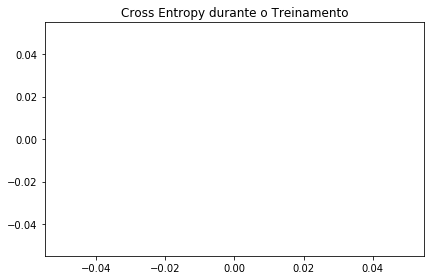

In [8]:
import matplotlib.pyplot as plt
plt.title("Cross Entropy durante o Treinamento")
plt.tight_layout()
_ = plt.plot(losses)
plt.show()

In [9]:
def one_hot(results):
    results = results.cpu().detach().numpy().tolist()[0]
    return results.index(max(results))

In [10]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=1)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=1)

# Avaliar o modelo aqui (no conjunto de teste)
inputs_list = []
labels_list = []
for _, (inputs, labels) in enumerate(train_loader):
    inputs_list.append(inputs.to(device))
    labels_list.append(labels.to(device))


acuracia = 0
results = [0,0,0,0,0,0,0,0,0,0]
for i, (inputs, labels) in enumerate(zip(inputs_list, labels_list), 0):
    y_pred = model(inputs)
    
    result = one_hot(y_pred)
    
    if result == labels.item():
        acuracia += 1
    
    results[result] += 1
    
print(acuracia / 50000 * 100, "%")
print(results)

59.812 %
[5426, 4780, 5024, 3938, 5537, 4141, 4988, 6098, 4892, 5176]


In [11]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=1)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=1)

# Avaliar o modelo aqui (no conjunto de teste)
inputs_list = []
labels_list = []
for _, (inputs, labels) in enumerate(test_loader):
    inputs_list.append(inputs.to(device))
    labels_list.append(labels.to(device))


acuracia = 0
results = [0,0,0,0,0,0,0,0,0,0]
for i, (inputs, labels) in enumerate(zip(inputs_list, labels_list), 0):
    y_pred = model(inputs)
    
    result = one_hot(y_pred)
    
    if result == labels.item():
        acuracia += 1
    
    results[result] += 1
    
print(acuracia / 50000 * 100, "%")
print(results)

8.882 %
[1094, 882, 1010, 747, 1129, 861, 986, 1241, 984, 1066]
